In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

### CPU and Memory Usage

In [35]:
MAX_MEASURES = 15
DIRECTORY_PATH = "cpu-memory/"
txt_files = glob.glob(os.path.join(DIRECTORY_PATH, "*.txt"))
files = [os.path.basename(file) for file in txt_files]

# Delete files with a small number of measurements =============
# for filename in files:
#     with open(DIRECTORY_PATH + filename, "r") as file:
#         lines = file.readlines()
#     if(len(lines) < 10):
#         os.remove(DIRECTORY_PATH + filename)
# txt_files = glob.glob(os.path.join(DIRECTORY_PATH, "*.txt"))
# files = [os.path.basename(file) for file in txt_files]
# ==============================================================

main_average_dict = {} # dict of tuple lists [(memory_usage_1, cpu_usage_1), (...)]
""" example structure
{
    ('nasa', '100000', '15000'): {
        'json_dummy': [(80.9, 75.025), (77.25, 56.425)],
        'json_first_list_flattener': [(81.92, 70.76), (76.575, 58.025), (77.8, 68.9)]
    },
    ('nasa', '1000000', '12000'): {
        'json_dummy': [(78.46, 90.97), (80.784, 88.621)]
    }
}
"""


for filename in files:
    file_tags = filename.split("---")
    test_key = (file_tags[0], file_tags[1]) # dataset, dataset_size
    flatter_key = file_tags[2] # flatter_method

    df = pd.read_csv(DIRECTORY_PATH + filename, sep=";")
    if test_key not in main_average_dict:
        main_average_dict[test_key] = {}
    if flatter_key not in main_average_dict[test_key]:
        main_average_dict[test_key][flatter_key] = []

    mem_avg = round(df.iloc[:, 0].mean(), 3)
    cpu_avg = round(df.iloc[:, 1].mean(), 3)
    main_average_dict[test_key][flatter_key].append((mem_avg, cpu_avg))

# Get max 12 last measurements
for test_key in main_average_dict.keys():
    for key, value in main_average_dict[test_key].items():
        if len(value) > MAX_MEASURES:
            main_average_dict[test_key][key] = value[-MAX_MEASURES:]

print("Keys of main_average_dict:")
for key in main_average_dict.keys():
    print(key)


def draw_usage_plot(key: tuple):
    if key not in main_average_dict.keys():
        print(f"Key {key} not found!")
        return

    measurements = main_average_dict[key].copy()
    DUMMY_KEY = "json_dummy"
    dummy_measurement = measurements[DUMMY_KEY]

    if (dummy_measurement is None or len(dummy_measurement) < 1):
        print("No dummy measures!")
        return

    measurements.pop(DUMMY_KEY)
    df_memory_usage = pd.DataFrame()
    df_cpu_usage = pd.DataFrame()

    for method, usage in measurements.items():
        real_usage = [
            (
                round(usage[i][0], 3),
                round(usage[i][1], 3)
            )
            for i in range(len(usage))
        ]

        # Subtract from dummy
        # real_usage = [
        #     (
        #         round(usage[i][0] - dummy_measurement[min(i, len(dummy_measurement) - 1)][0], 3),
        #         round(usage[i][1] - dummy_measurement[min(i, len(dummy_measurement) - 1)][1], 3)
        #     )
        #     for i in range(len(usage))
        # ]

        # Delete value if < 0
        # real_usage = [
        #     (
        #         val1 if val1 > 0 else np.nan,
        #         val2 if val2 > 0 else np.nan
        #     )
        #     for val1, val2 in real_usage
        # ]

        while len(real_usage) < MAX_MEASURES:
            real_usage.append((np.nan, np.nan))
        df_memory_usage[method], df_cpu_usage[method] = zip(*real_usage)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    usage_plots = [
        (df_memory_usage, ax1, "Memory Usage [%]"),
        (df_cpu_usage, ax2, "CPU Usage [%]")
    ]

    for (final_df, sub_ax, title) in usage_plots:
        final_df.boxplot(ax=sub_ax, grid=False)
        sub_ax.grid(axis='y')
        sub_ax.set_title(title)

    plt.tight_layout()
    plt.show()

Keys of main_average_dict:
('airlines', '1000000')
('gists', '100000')
('movies', '1000000')
('nasa', '1000000')
('reddit', '10000')


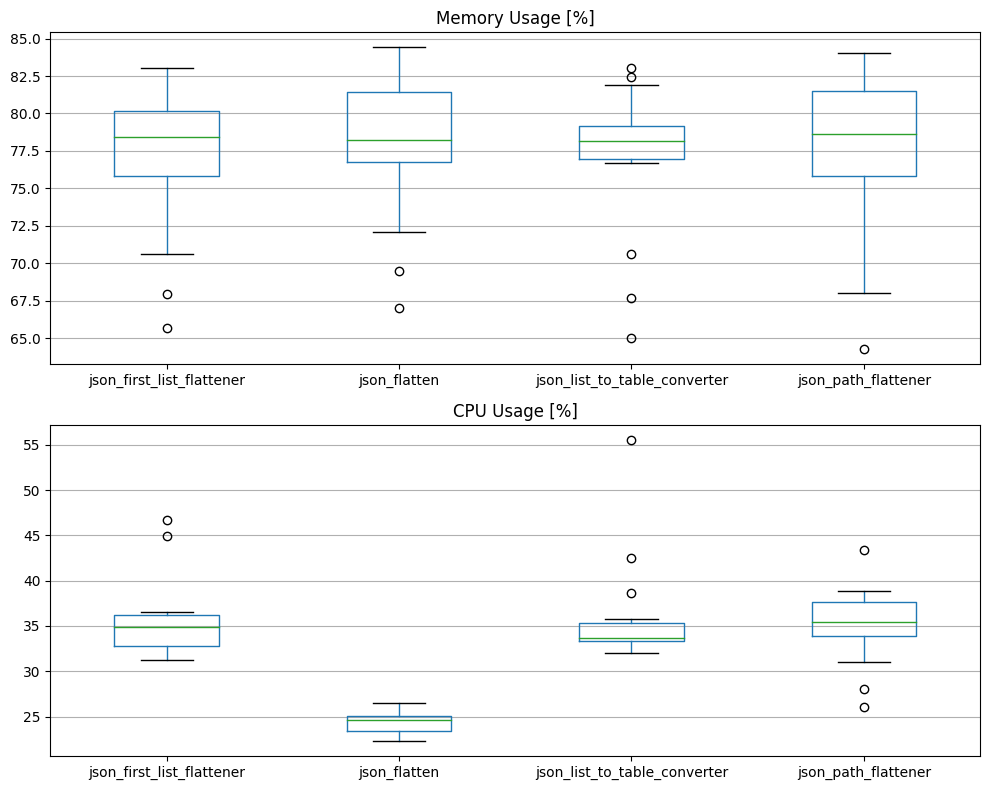

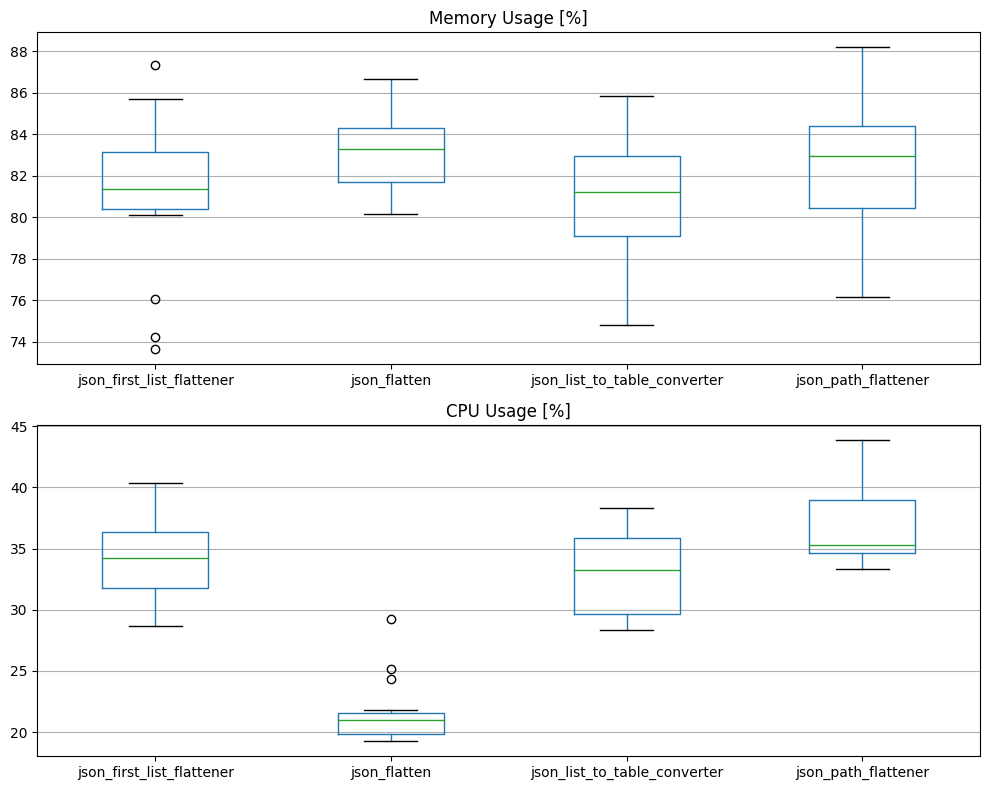

In [36]:
# draw_usage_plot(('airlines', '1000000'))
# draw_usage_plot(('movies', '1000000'))
# draw_usage_plot(('nasa', '1000000'))

draw_usage_plot(('gists', '100000'))
draw_usage_plot(('reddit', '10000'))